# Model Development - Inception V3 - 30% Test Size - Epoch 20

In [1]:
import pandas as pd
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

/home/insomnius/.pyenv/versions/3.11.6/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)
image_files = os.listdir('images/')
filtered_df = df[df.index.isin(image_files)]
filtered_df

/tmp/ipykernel_11179/2986566526.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [3]:
train_files = os.listdir('train/')
test_files = os.listdir('test/')

In [5]:
train_df = filtered_df[filtered_df.index.isin(train_files)]

train_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
000201.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [6]:
male_data = train_df.loc[train_df['Male'] == '1']['Male']
female_data = train_df.loc[train_df['Male'] == '-1']['Male']
total_data = male_data.count() + female_data.count()

print("Training data male / female ratio")
{
  "male data": male_data.count(),
  "female data": female_data.count(),
  "total data": total_data,
  'ratio male data': male_data.count() / total_data,
  'ratio female data': female_data.count() / total_data
}

Training data male / female ratio


/tmp/ipykernel_11179/1895681520.py:10: RuntimeWarning: invalid value encountered in scalar divide
  'ratio male data': male_data.count() / total_data,
/tmp/ipykernel_11179/1895681520.py:11: RuntimeWarning: invalid value encountered in scalar divide
  'ratio female data': female_data.count() / total_data


{'male data': 0,
 'female data': 0,
 'total data': 0,
 'ratio male data': nan,
 'ratio female data': nan}

In [7]:
test_df = filtered_df[filtered_df.index.isin(test_files)]

test_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000352.jpg,-1,-1,1,1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000414.jpg,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000608.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
000798.jpg,-1,-1,-1,1,-1,1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201867.jpg,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1
201956.jpg,1,1,-1,-1,-1,-1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
201989.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202200.jpg,-1,-1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1


In [8]:
male_data = test_df.loc[test_df['Male'] == '1']['Male']
female_data = test_df.loc[test_df['Male'] == '-1']['Male']
total_data = male_data.count() + female_data.count()


print("Test data male / female ratio")
{
  "male data": male_data.count(),
  "female data": female_data.count(),
  "total data": total_data,
  'ratio male data': male_data.count() / total_data,
  'ratio female data': female_data.count() / total_data
}

Test data male / female ratio


/tmp/ipykernel_11179/3731383983.py:11: RuntimeWarning: invalid value encountered in scalar divide
  'ratio male data': male_data.count() / total_data,
/tmp/ipykernel_11179/3731383983.py:12: RuntimeWarning: invalid value encountered in scalar divide
  'ratio female data': female_data.count() / total_data


{'male data': 0,
 'female data': 0,
 'total data': 0,
 'ratio male data': nan,
 'ratio female data': nan}

In [9]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
train_df.rename(columns={'index': 'image_id'}, inplace=True)
test_df.rename(columns={'index': 'image_id'}, inplace=True)

/tmp/ipykernel_11179/3540797913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'index': 'image_id'}, inplace=True)
/tmp/ipykernel_11179/3540797913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'index': 'image_id'}, inplace=True)


In [14]:
mapping = {1: 'Male', -1: 'Female'}

test_df['Male'] = test_df['Male'].replace(mapping)
train_df['Male'] = train_df['Male'].replace(mapping)

/tmp/ipykernel_11179/2230288316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Male'] = test_df['Male'].replace(mapping)
/tmp/ipykernel_11179/2230288316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Male'] = train_df['Male'].replace(mapping)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3

2024-03-11 19:06:32.587630: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-11 19:06:32.618943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 19:06:32.618975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 19:06:32.619748: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 19:06:32.625057: I tensorflow/core/platform/cpu_feature_guar

In [19]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_dataframe(
 dataframe=train_df,
 directory='train/',
 x_col='image_id',
 y_col='Male',
 subset='training',
 batch_size=32,
 seed=42,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)

valid_generator = datagen.flow_from_dataframe(
 dataframe=test_df,
 directory='test/', # Update with the path to your CelebA images
 x_col='image_id',
 y_col='Male',
 subset='validation',
 batch_size=32,
 seed=42,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)


# Load InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

Found 2450 validated image filenames belonging to 2 classes.
Found 450 validated image filenames belonging to 2 classes.


In [20]:
# Create a new model on top of InceptionV3
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax')) # Binary classification
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
 train_generator,
 epochs=20,
 validation_data=valid_generator
)

Epoch 1/20


2024-03-11 19:07:29.805532: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-11 19:07:36.105390: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd55b2151b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-11 19:07:36.105452: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-03-11 19:07:36.133328: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710158856.287794   11744 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 [==============================] - 66s 347ms/step - loss: 0.3267 - accuracy: 0.4053 - val_loss: 1.8457 - val_accuracy: 0.4267
Epoch 2/20
77/77 [==============================] - 6s 83ms/step - loss: 0.1542 - accuracy: 0.4053 - val_loss: 1.4194 - val_accuracy: 0.4267
Epoch 3/20
77/77 [==============================] - 6s 81ms/step - loss: 0.1428 - accuracy: 0.4053 - val_loss: 0.7133 - val_accuracy: 0.4267
Epoch 4/20
77/77 [==============================] - 6s 81ms/step - loss: 0.0898 - accuracy: 0.4053 - val_loss: 0.2125 - val_accuracy: 0.4267
Epoch 5/20
77/77 [==============================] - 7s 84ms/step - loss: 0.0467 - accuracy: 0.4053 - val_loss: 0.1910 - val_accuracy: 0.4267
Epoch 6/20
77/77 [==============================] - 6s 83ms/step - loss: 0.0473 - accuracy: 0.4053 - val_loss: 0.1516 - val_accuracy: 0.4267
Epoch 7/20
77/77 [==============================] - 6s 82ms/step - loss: 0.0211 - accuracy: 0.4053 - val_loss: 0.2663 - val_accuracy: 0.4267
Epoch 8/20
77/77 [====

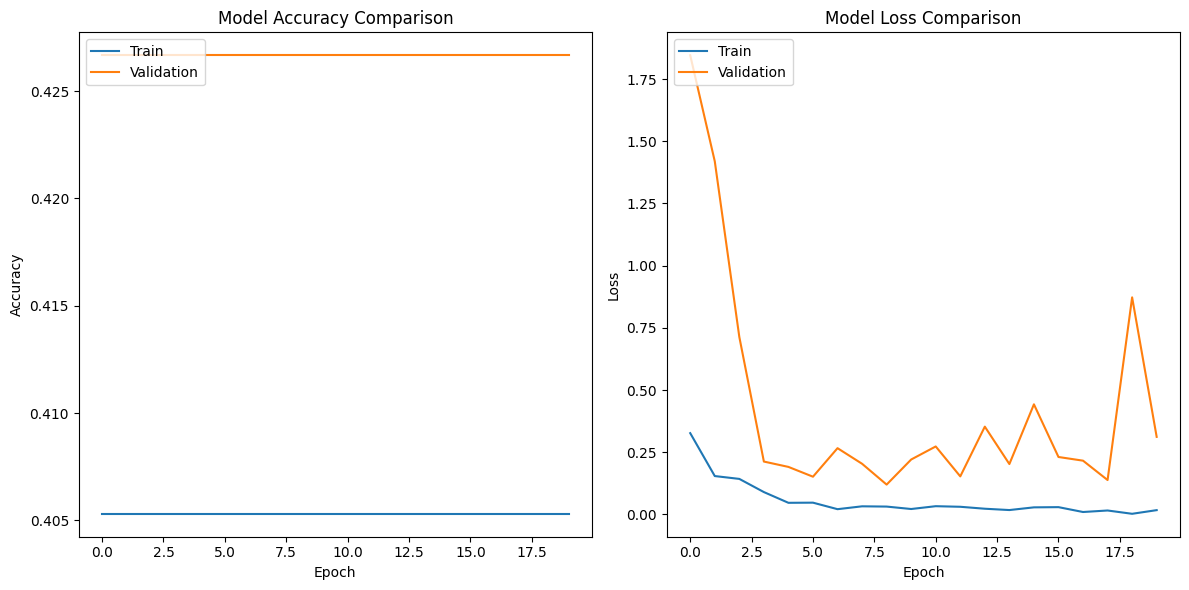

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
# ... (kode lainnya seperti di atas)
# Train the model
# Plot training history
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# Show plots
plt.tight_layout()
plt.show()

In [22]:
history.history['accuracy']

[0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593,
 0.4053061306476593]

In [23]:
history.history['val_accuracy']

[0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384,
 0.4266666769981384]

In [24]:
# Evaluate the model on the validation set
evaluation = model.evaluate(valid_generator)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

15/15 [==============================] - 1s 22ms/step - loss: 0.3117 - accuracy: 0.4267
Validation Loss: 0.31171613931655884
Validation Accuracy: 0.4266666769981384


15/15 [==============================] - 1s 34ms/step - loss: 0.3117 - accuracy: 0.4267
Validation Loss: 0.3117161691188812
Validation Accuracy: 0.4266666769981384
15/15 [==============================] - 1s 20ms/step


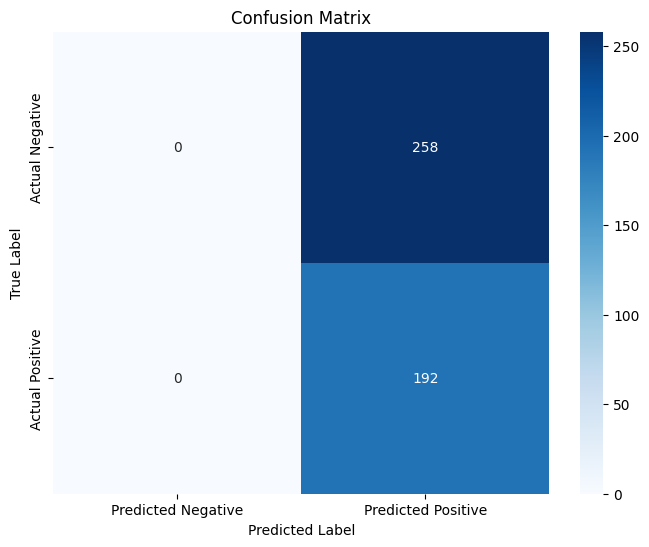

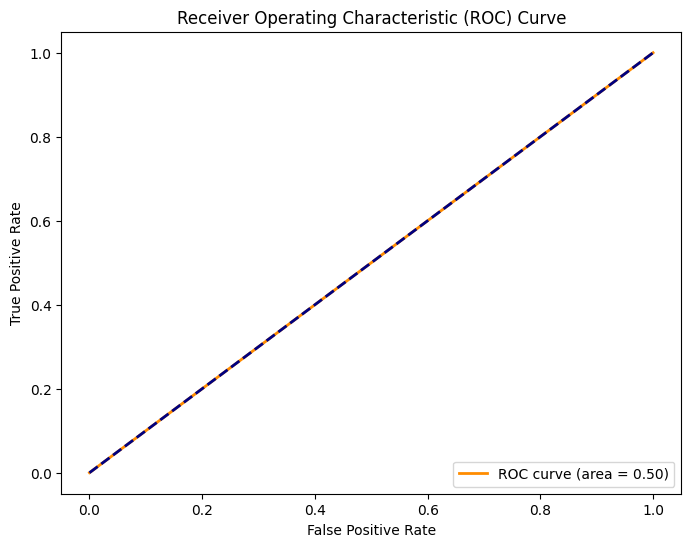

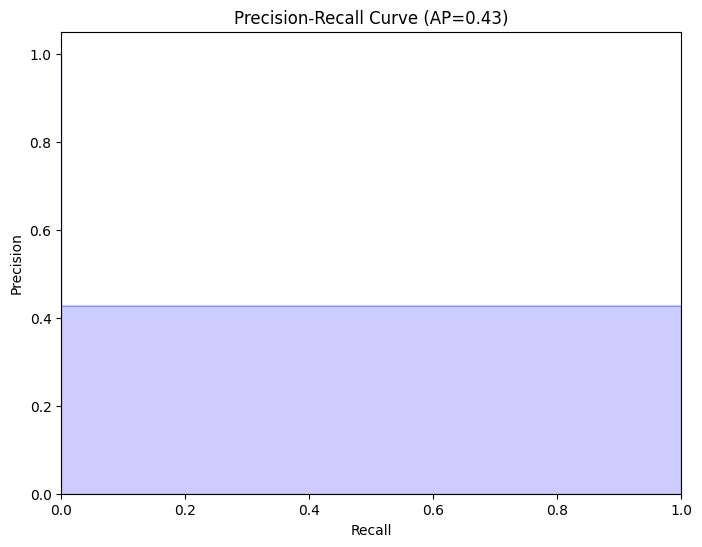

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Evaluate the model on the validation set
evaluation = model.evaluate(valid_generator)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")
# Plot the confusion matrix
true_labels = valid_generator.classes
predictions = model.predict(valid_generator)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
conf_matrix = confusion_matrix(true_labels, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
 xticklabels=['Predicted Negative', 'Predicted Positive'],
 yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, predictions)
average_precision = average_precision_score(true_labels, predictions)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={0:.2f})'.format(average_precision))
plt.show()

In [26]:
model.save("model_saved/inception-v3-30%-test-size-epoch-20-softmax.h5")

/home/insomnius/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
